## 1. Importing Libraries

In [1]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.ensemble import IsolationForest

## 2. Reading Training Data

In [2]:
train = pd.read_csv(r"C:\Users\rahul\OneDrive\Desktop\flight sagemaker project\data\train.csv")
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-05-27,Delhi,Cochin,20:55:00,12:35:00,940,1.0,In-flight meal not included,12898
1,Jet Airways,2019-06-12,Kolkata,Banglore,18:55:00,16:20:00,1285,1.0,No Info,13044
2,Air India,2019-05-18,Delhi,Cochin,09:45:00,09:25:00,1420,2.0,No Info,10975
3,Indigo,2019-06-03,Mumbai,Hyderabad,21:20:00,22:50:00,90,0.0,No Info,2227
4,Jet Airways,2019-04-01,Mumbai,Hyderabad,02:55:00,04:20:00,85,0.0,No Info,5678
...,...,...,...,...,...,...,...,...,...,...
6689,Spicejet,2019-06-09,Kolkata,Banglore,11:35:00,18:50:00,435,1.0,No Info,8479
6690,Multiple Carriers,2019-05-09,Delhi,Cochin,10:00:00,01:30:00,930,1.0,No Info,15078
6691,Air India,2019-05-18,Delhi,Cochin,12:00:00,07:40:00,1180,2.0,No Info,8603
6692,Air Asia,2019-05-18,Delhi,Cochin,07:55:00,13:25:00,330,1.0,No Info,8759


In [3]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [4]:
train = train.assign(**{
    col: pd.to_datetime(train.loc[:,col],dayfirst=True, format="mixed")
    for col in ["date_of_journey","dep_time","arrival_time"]
})

train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [5]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-05-27,Delhi,Cochin,2025-07-20 20:55:00,2025-07-20 12:35:00,940,1.0,In-flight meal not included,12898
1,Jet Airways,2019-06-12,Kolkata,Banglore,2025-07-20 18:55:00,2025-07-20 16:20:00,1285,1.0,No Info,13044
2,Air India,2019-05-18,Delhi,Cochin,2025-07-20 09:45:00,2025-07-20 09:25:00,1420,2.0,No Info,10975
3,Indigo,2019-06-03,Mumbai,Hyderabad,2025-07-20 21:20:00,2025-07-20 22:50:00,90,0.0,No Info,2227
4,Jet Airways,2019-04-01,Mumbai,Hyderabad,2025-07-20 02:55:00,2025-07-20 04:20:00,85,0.0,No Info,5678
...,...,...,...,...,...,...,...,...,...,...
6689,Spicejet,2019-06-09,Kolkata,Banglore,2025-07-20 11:35:00,2025-07-20 18:50:00,435,1.0,No Info,8479
6690,Multiple Carriers,2019-05-09,Delhi,Cochin,2025-07-20 10:00:00,2025-07-20 01:30:00,930,1.0,No Info,15078
6691,Air India,2019-05-18,Delhi,Cochin,2025-07-20 12:00:00,2025-07-20 07:40:00,1180,2.0,No Info,8603
6692,Air Asia,2019-05-18,Delhi,Cochin,2025-07-20 07:55:00,2025-07-20 13:25:00,330,1.0,No Info,8759


## 3. Summary of Data

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6694 entries, 0 to 6693
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          6694 non-null   object        
 1   date_of_journey  6694 non-null   datetime64[ns]
 2   source           6694 non-null   object        
 3   destination      6694 non-null   object        
 4   dep_time         6694 non-null   datetime64[ns]
 5   arrival_time     6694 non-null   datetime64[ns]
 6   duration         6694 non-null   int64         
 7   total_stops      6694 non-null   float64       
 8   additional_info  6694 non-null   object        
 9   price            6694 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 523.1+ KB


In [7]:
train.describe(include="number")

,duration,total_stops,price
count,6694.000000,6694.000000,6694.000000
mean,637.633702,0.812668,9092.553331
std,504.395941,0.658143,4670.489223
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5277.000000
50%,515.000000,1.000000,8372.000000
75%,925.000000,1.000000,12373.000000
max,2860.000000,3.000000,79512.000000


## 4. Analysis of Outliers

In [8]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [9]:
(
    train
    .assign(outlier=forest.fit_predict(train
                                       .drop(columns="price")
                                       .select_dtypes(include="number")))
    .query("outlier == -1")
    #.duration
    #.describe()
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
1,Jet Airways,2019-06-12,Kolkata,Banglore,2025-07-20 18:55:00,2025-07-20 16:20:00,1285,1.0,No Info,13044,-1
2,Air India,2019-05-18,Delhi,Cochin,2025-07-20 09:45:00,2025-07-20 09:25:00,1420,2.0,No Info,10975,-1
3,Indigo,2019-06-03,Mumbai,Hyderabad,2025-07-20 21:20:00,2025-07-20 22:50:00,90,0.0,No Info,2227,-1
4,Jet Airways,2019-04-01,Mumbai,Hyderabad,2025-07-20 02:55:00,2025-07-20 04:20:00,85,0.0,No Info,5678,-1
7,Jet Airways,2019-05-09,Delhi,Cochin,2025-07-20 23:05:00,2025-07-20 04:25:00,1760,2.0,No Info,15129,-1
...,...,...,...,...,...,...,...,...,...,...,...
6676,Jet Airways,2019-05-24,Kolkata,Banglore,2025-07-20 18:55:00,2025-07-20 23:35:00,1720,1.0,In-flight meal not included,10844,-1
6681,Jet Airways,2019-06-21,Delhi,Cochin,2025-07-20 11:00:00,2025-07-20 14:15:00,195,0.0,In-flight meal not included,4256,-1
6682,Jet Airways,2019-05-01,Kolkata,Banglore,2025-07-20 09:35:00,2025-07-20 14:25:00,1730,1.0,No Info,11467,-1
6687,Jet Airways,2019-06-15,Delhi,Cochin,2025-07-20 21:25:00,2025-07-20 12:35:00,910,2.0,In-flight meal not included,9905,-1


## 5. Pair plots

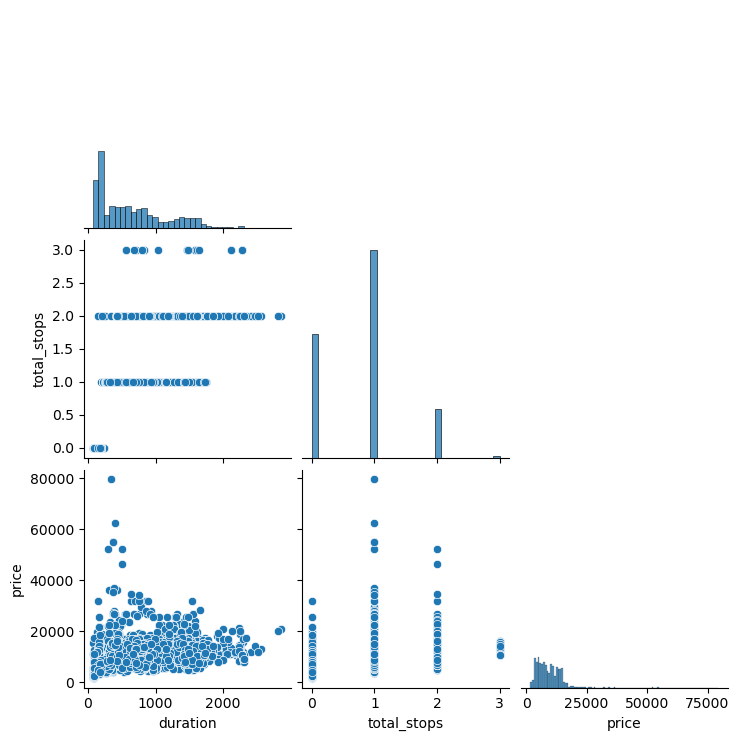

In [10]:
sns.pairplot(train,corner=True)
plt.show()

## 6. Correlation Analysis

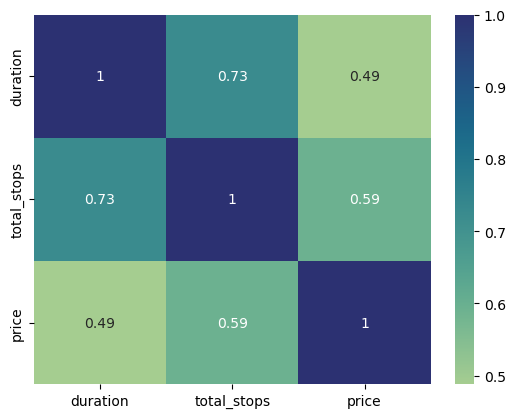

In [11]:
corr = train.select_dtypes(include="number").corr()
sns.heatmap(corr, annot=True, cmap="crest")
plt.show()

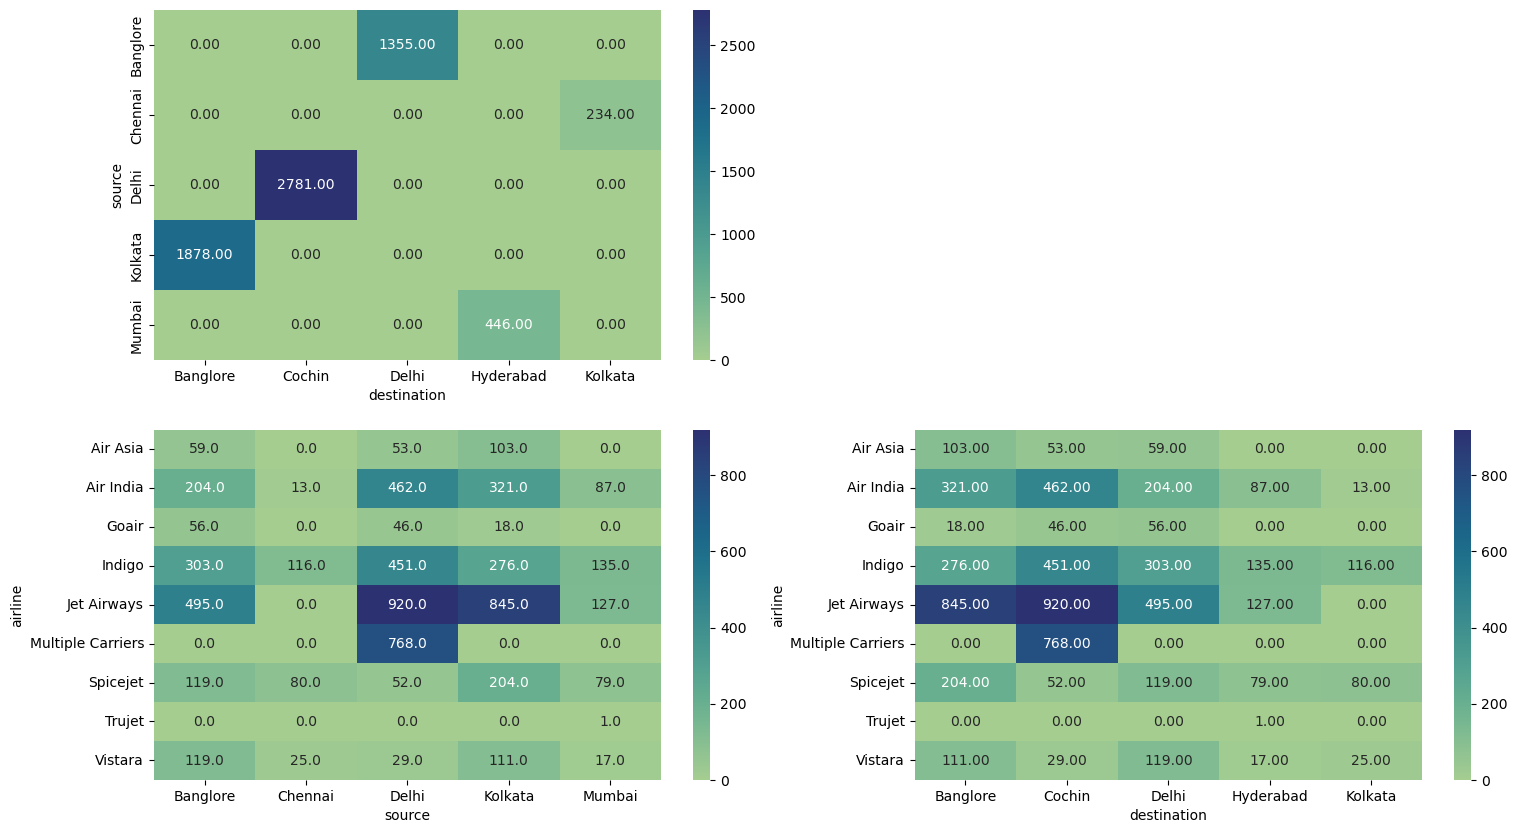

In [12]:
fig, axes = plt.subplots(2,2,figsize=(18,10))
sns.heatmap(pd.crosstab(train["source"], train["destination"]),annot=True,fmt=".2f",cmap="crest",ax=axes[0,0])
sns.heatmap(pd.crosstab(train["airline"],train["source"]),annot=True,fmt=".1f",cmap="crest",ax=axes[1,0])
sns.heatmap(pd.crosstab(train["airline"], train["destination"]),annot=True,fmt=".2f",cmap="crest",ax=axes[1,1])
axes[0, 1].set_visible(False)
plt.show()

## 7. Detailed Analysis

In [13]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

### 7.1 airline 

In [14]:
train.airline

0             Jet Airways
1             Jet Airways
2               Air India
3                  Indigo
4             Jet Airways
              ...        
6689             Spicejet
6690    Multiple Carriers
6691            Air India
6692             Air Asia
6693    Multiple Carriers
Name: airline, Length: 6694, dtype: object

In [15]:
print("Unique Values :\n",train.airline.unique())
print("\n Cardinality : ",train.airline.nunique())
print("\n Missing Values : ",train.airline.isna().sum()," i.e",train.airline.isna().mean()*100,"%")
print("\n Summary :\n",train.airline.describe())
print("\n Categories Distribution :\n",train.airline.value_counts())

Unique Values :
 ['Jet Airways' 'Air India' 'Indigo' 'Goair' 'Multiple Carriers' 'Vistara'
 'Spicejet' 'Air Asia' 'Trujet']

 Cardinality :  9

 Missing Values :  0  i.e 0.0 %

 Summary :
 count            6694
unique              9
top       Jet Airways
freq             2387
Name: airline, dtype: object

 Categories Distribution :
 airline
Jet Airways          2387
Indigo               1281
Air India            1087
Multiple Carriers     768
Spicejet              534
Vistara               301
Air Asia              215
Goair                 120
Trujet                  1
Name: count, dtype: int64


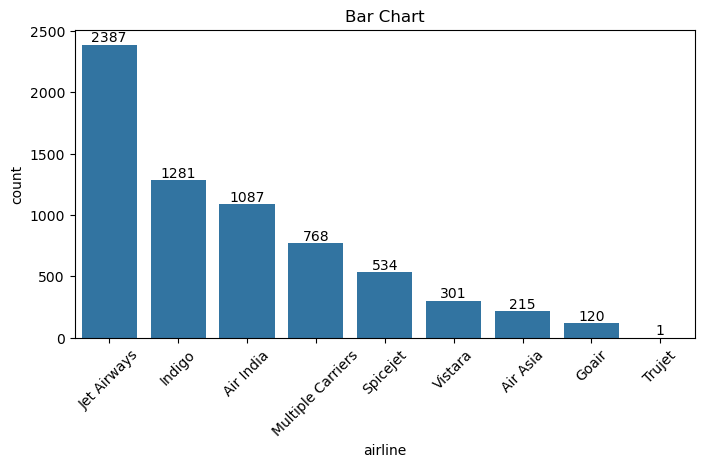

In [16]:
plt.figure(figsize=(8,4))
ax=sns.countplot(x=train.airline,data=train,order=train.airline.value_counts().index)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Bar Chart")
plt.xticks(rotation=45)
plt.show()

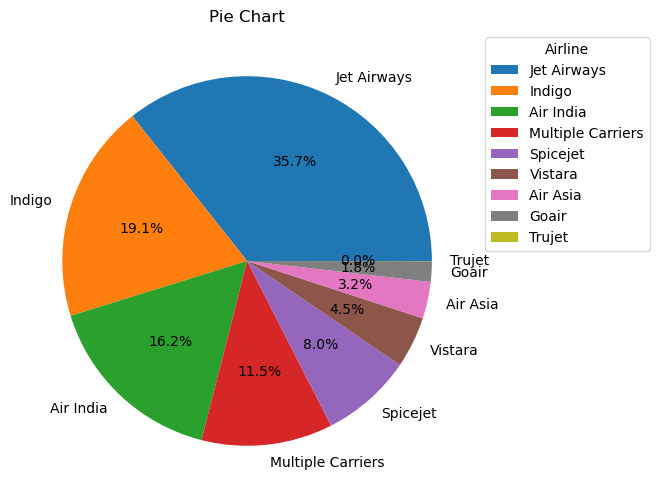

In [17]:
plt.figure(figsize=(8,6))
plt.pie(train.airline.value_counts(),labels=train.airline.value_counts().index,autopct="%1.1f%%")
plt.legend(bbox_to_anchor=(1,1),loc="upper left",title="Airline")
plt.title("Pie Chart")
plt.show()

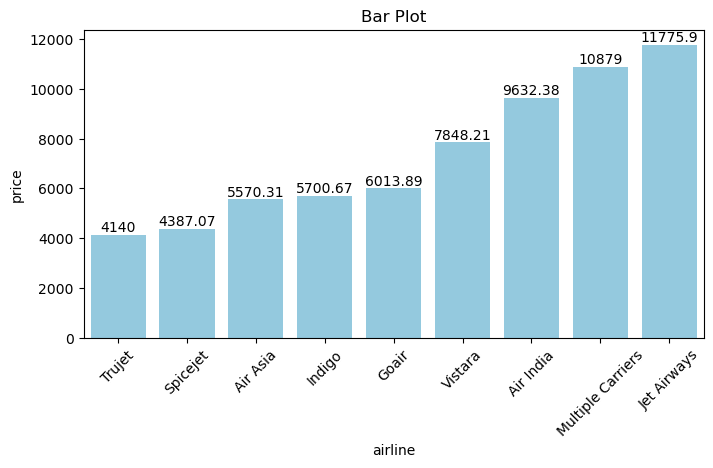

In [18]:
plt.figure(figsize=(8,4))
order=train.groupby('airline').price.mean().sort_values().index
ax=sns.barplot(x=train.airline, y=train.price, order=order, errorbar=None, color='skyblue')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Bar Plot')
plt.xticks(rotation=45)
plt.show()

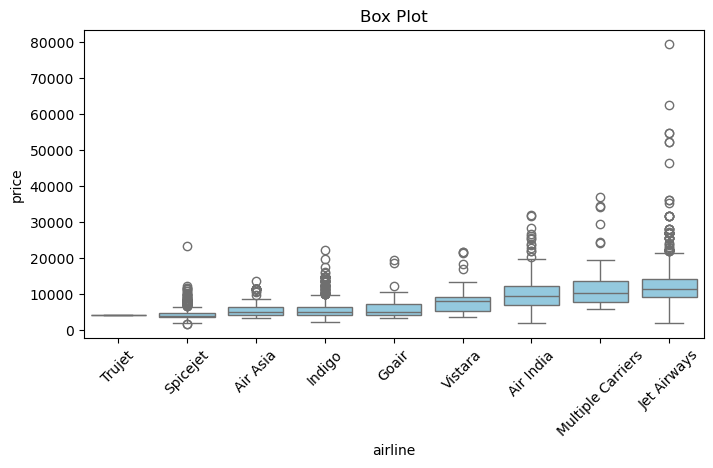

In [19]:
plt.figure(figsize=(8,4))
order=train.groupby('airline').price.mean().sort_values().index
sns.boxplot(x=train.airline, y=train.price, order=order, color='skyblue')
plt.title('Box Plot')
plt.xticks(rotation=45)
plt.show()

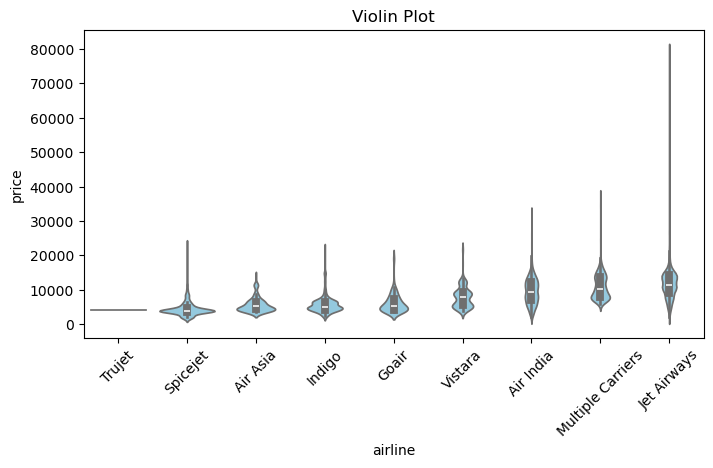

In [20]:
plt.figure(figsize=(8,4))
order=train.groupby('airline').price.mean().sort_values().index
sns.violinplot(x=train.airline, y=train.price, order=order, color='skyblue')
plt.title('Violin Plot')
plt.xticks(rotation=45)
plt.show()

C:\Users\rahul\anaconda3\envs\aws\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


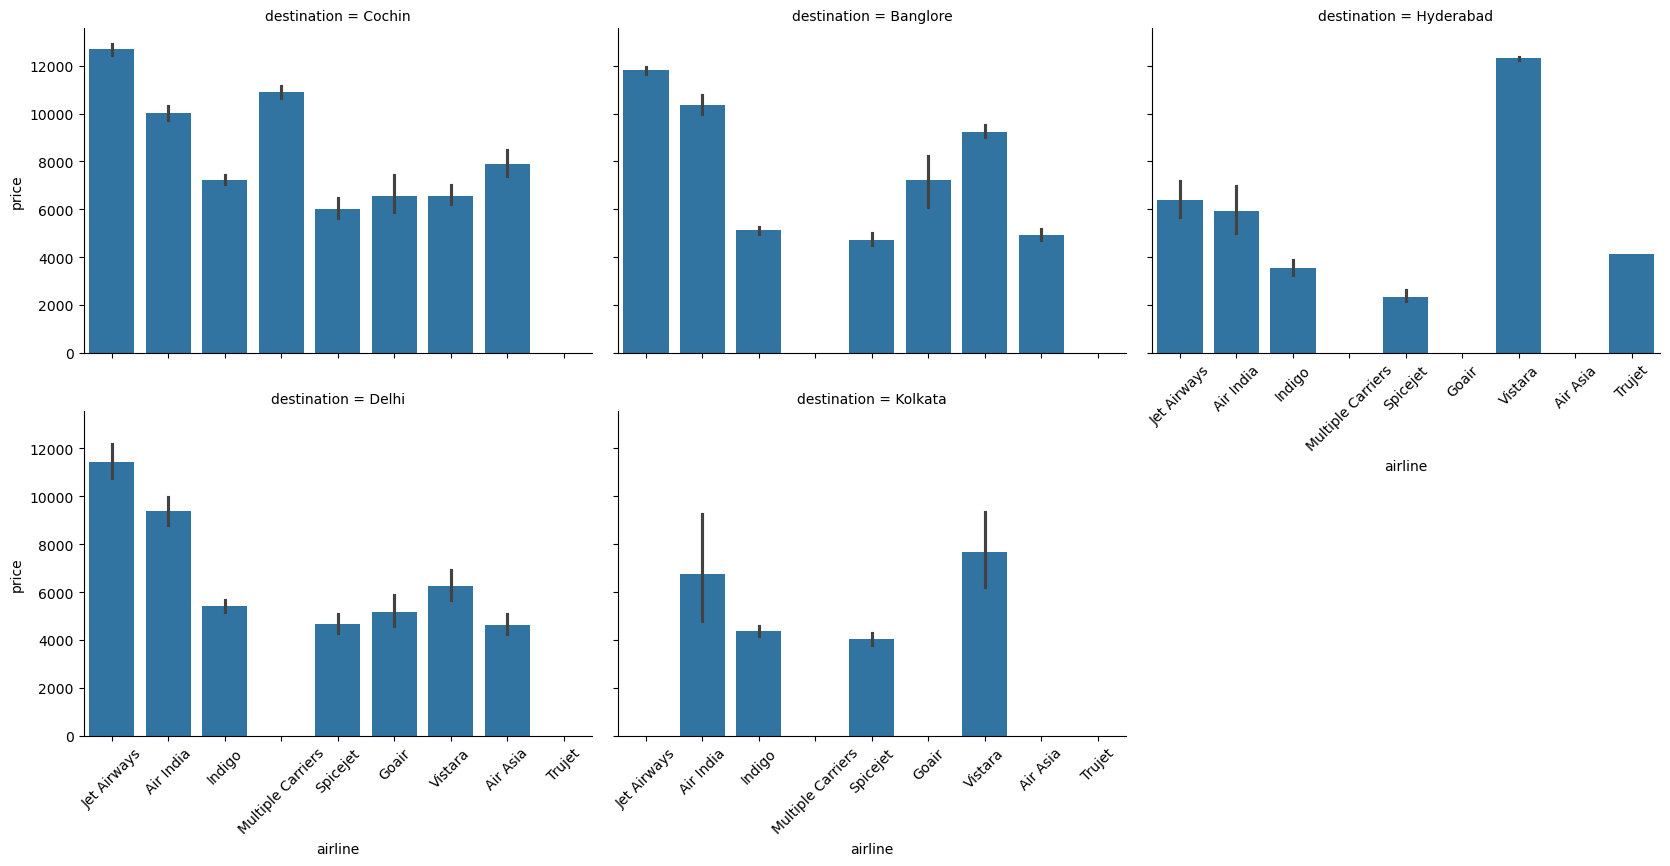

In [21]:
airline_grid = sns.FacetGrid(
    data=train,
    col="destination",
    col_wrap=3,
    height=4,
    aspect=1.4,
    sharey=True
)

airline_grid.map(sns.barplot,"airline", "price")

for ax in airline_grid.axes:
   for label in ax.get_xticklabels():
        label.set_rotation(45)

C:\Users\rahul\anaconda3\envs\aws\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


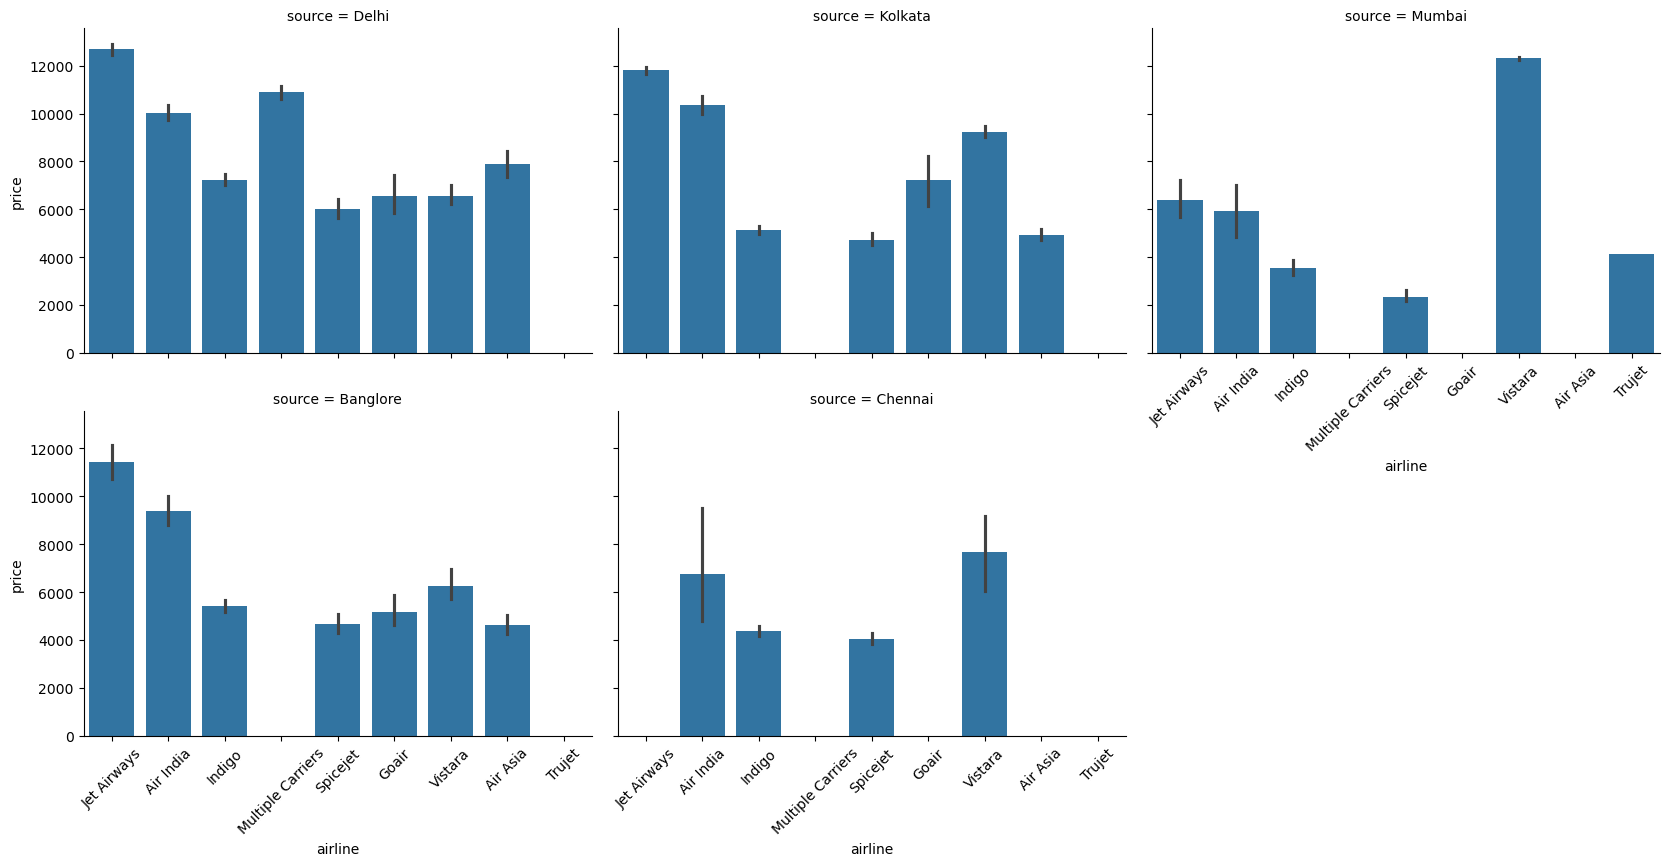

In [22]:
airline_grid = sns.FacetGrid(
    data=train,
    col="source",
    col_wrap=3,
    height=4,
    aspect=1.4,
    sharey=True
)

airline_grid.map(sns.barplot,"airline", "price")

for ax in airline_grid.axes:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

### 7.2 date_of_journey

In [23]:
train.date_of_journey

0      2019-05-27
1      2019-06-12
2      2019-05-18
3      2019-06-03
4      2019-04-01
          ...    
6689   2019-06-09
6690   2019-05-09
6691   2019-05-18
6692   2019-05-18
6693   2019-04-09
Name: date_of_journey, Length: 6694, dtype: datetime64[ns]

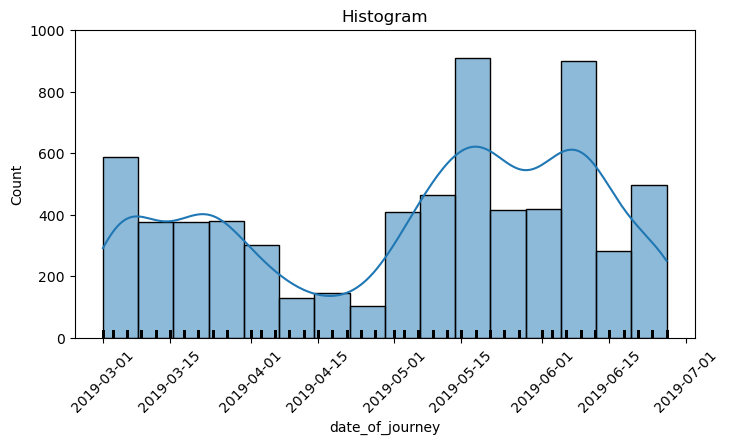

In [24]:
plt.figure(figsize=(8,4))
sns.histplot(data=train, x=train.date_of_journey,kde=True)
sns.rugplot(data=train, x=train.date_of_journey,color="black")
plt.xticks(rotation=45)
plt.title("Histogram")
plt.show()

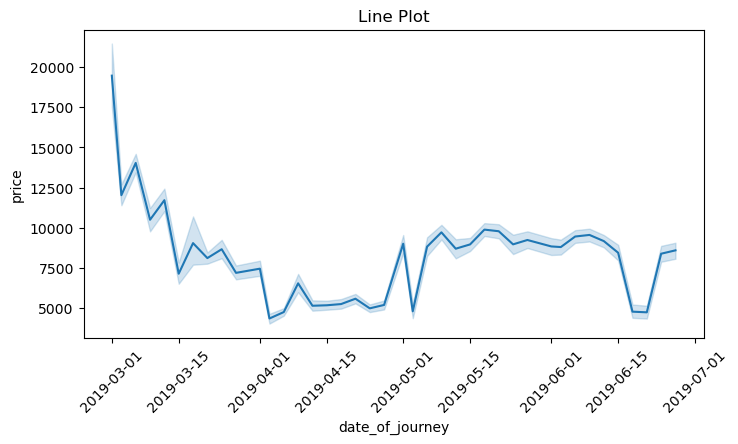

In [25]:
plt.figure(figsize=(8,4))
sns.lineplot(data=train, x=train.date_of_journey, y=train.price)
plt.xticks(rotation=45)
plt.title("Line Plot")
plt.show()

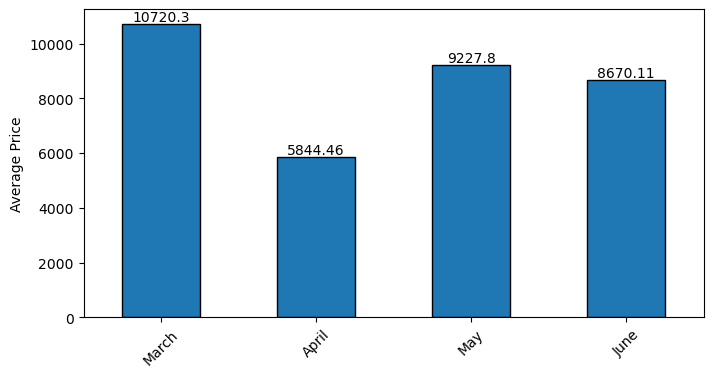

In [26]:
ax=(
    train
    .groupby(pd.Grouper(key="date_of_journey", freq="ME"))
    .price.mean()
    .set_axis(["March", "April", "May", "June"],axis=0)
    .plot(
        kind="bar",
        figsize=(8,4),
        edgecolor="black"
    )
)
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45)
plt.ylabel("Average Price")
plt.show()

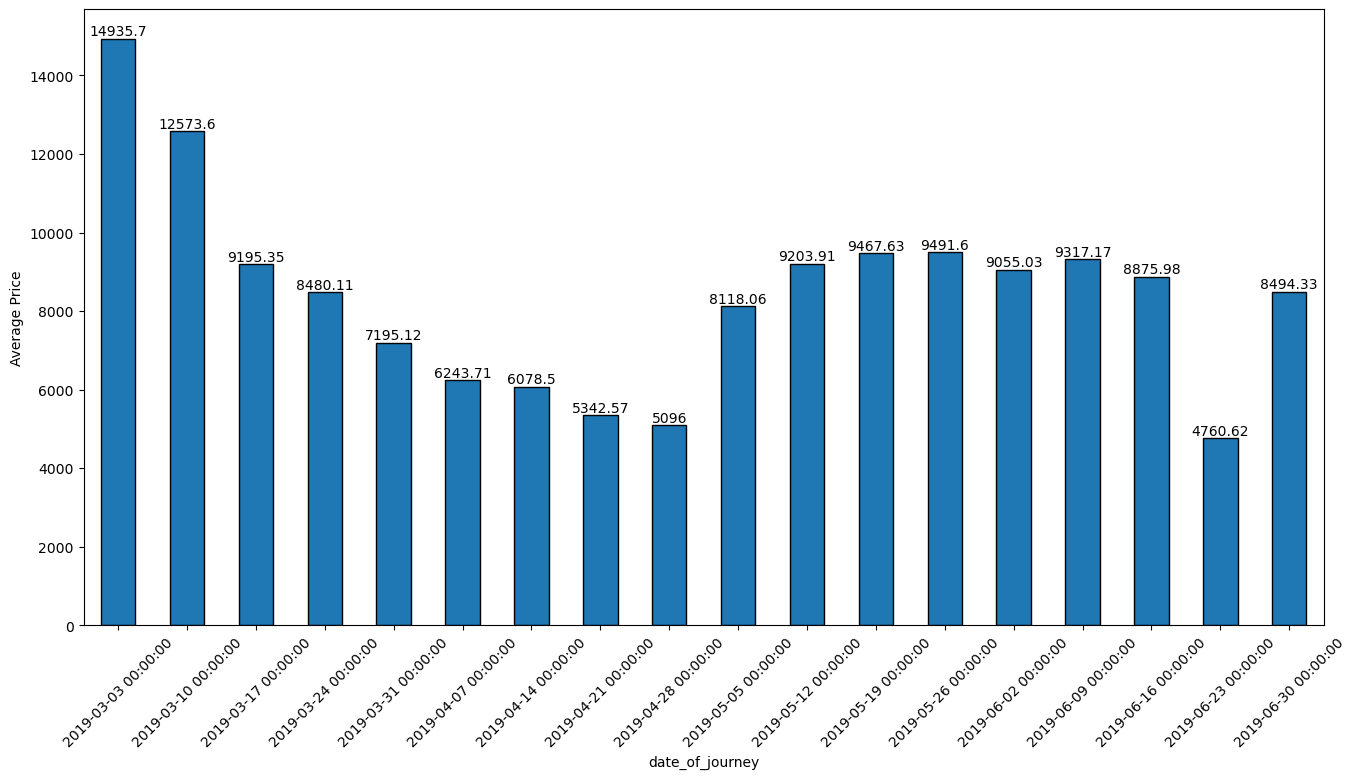

In [27]:
ax=(
    train
    .groupby(pd.Grouper(key="date_of_journey", freq="W"))
    .price.mean()
    .plot(
        kind="bar",
        figsize=(16,8),
        edgecolor="black"
    )
)
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45)
plt.ylabel("Average Price")
plt.show()

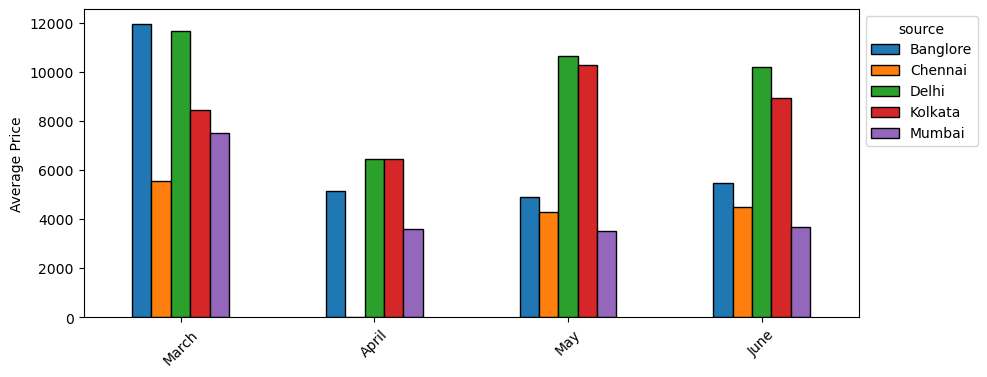

In [28]:
ax=(
    train
    .groupby([pd.Grouper(key="date_of_journey",freq="ME"),"source"])
    .price.mean()
    .unstack(fill_value=0)
    .set_axis(["March", "April", "May", "June"],axis=0)
    .plot(
        kind="bar",
        figsize=(10,4),
        edgecolor="black"
    )
)
ax.legend(title="source",bbox_to_anchor=(1,1),loc="upper left")
plt.xticks(rotation=45)
plt.ylabel("Average Price")
plt.show()

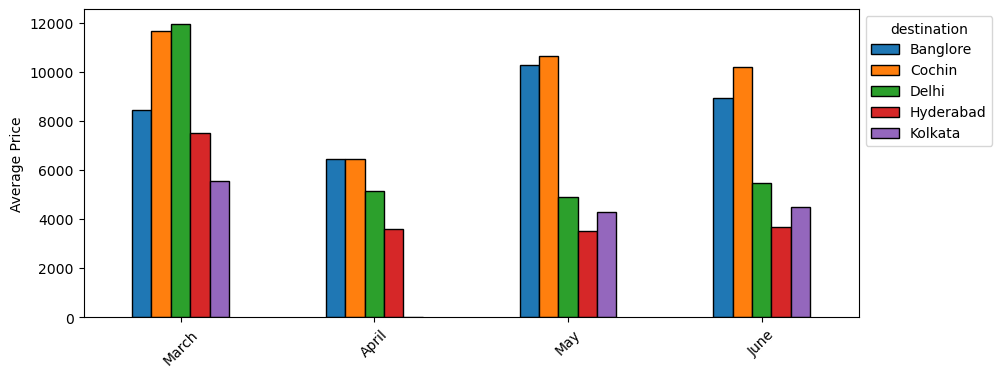

In [29]:
ax=(
    train
    .groupby([pd.Grouper(key="date_of_journey",freq="ME"),"destination"])
    .price.mean()
    .unstack(fill_value=0)
    .set_axis(["March", "April", "May", "June"],axis=0)
    .plot(
        kind="bar",
        figsize=(10,4),
        edgecolor="black"
    )
)
ax.legend(title="destination",bbox_to_anchor=(1,1),loc="upper left")
plt.xticks(rotation=45)
plt.ylabel("Average Price")
plt.show()

### 7.3 source

In [30]:
train.source

0         Delhi
1       Kolkata
2         Delhi
3        Mumbai
4        Mumbai
         ...   
6689    Kolkata
6690      Delhi
6691      Delhi
6692      Delhi
6693      Delhi
Name: source, Length: 6694, dtype: object

In [31]:
print("Unique Values :",train.source.unique())
print("\nCardinality :",train.source.nunique())
print("\nMissing Values :",train.source.isna().sum(),"i.e",train.source.isna().mean()*100,"%")
print("\nSummary :\n",train.source.describe())
print("\nCategories Distribution :\n",train.source.value_counts())

Unique Values : ['Delhi' 'Kolkata' 'Mumbai' 'Banglore' 'Chennai']

Cardinality : 5

Missing Values : 0 i.e 0.0 %

Summary :
 count      6694
unique        5
top       Delhi
freq       2781
Name: source, dtype: object

Categories Distribution :
 source
Delhi       2781
Kolkata     1878
Banglore    1355
Mumbai       446
Chennai      234
Name: count, dtype: int64


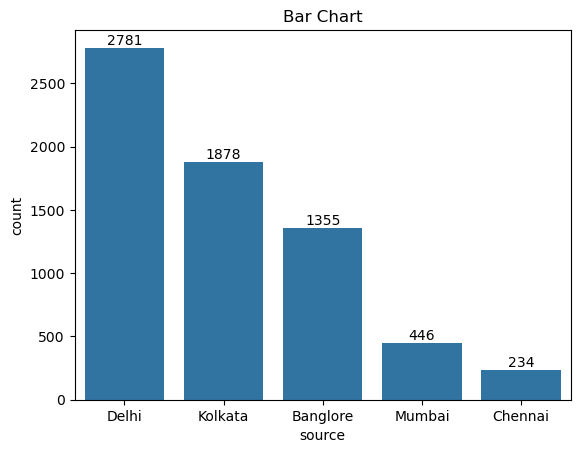

In [32]:
ax=sns.countplot(x=train.source,order=train.source.value_counts().index)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Bar Chart")
plt.show()

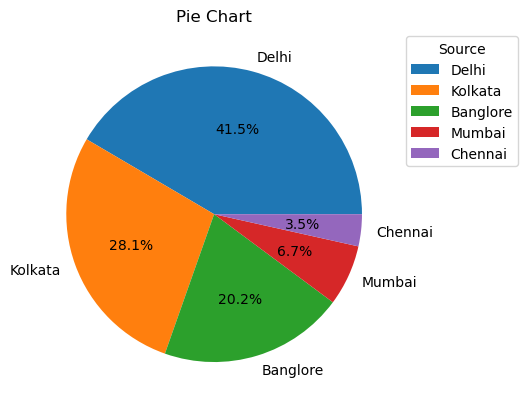

In [33]:
plt.pie(train.source.value_counts(),labels=train.source.value_counts().index, autopct="%1.1f%%")
plt.legend(bbox_to_anchor=(1,1),title="Source")
plt.title("Pie Chart")
plt.show()

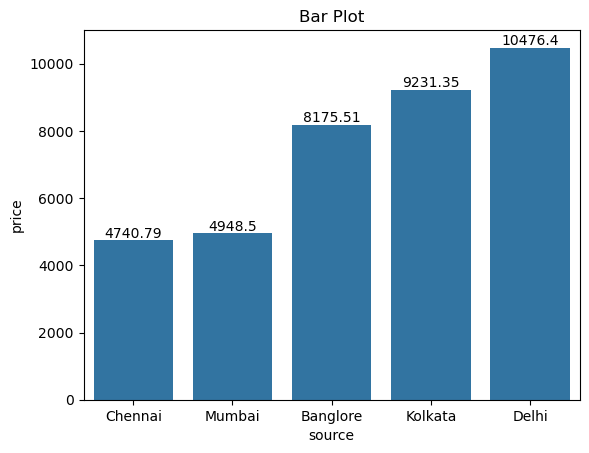

In [34]:
order= train.groupby("source").price.mean().sort_values().index
ax=sns.barplot(x=train.source, y=train.price, order=order, errorbar=None)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Bar Plot")
plt.show()

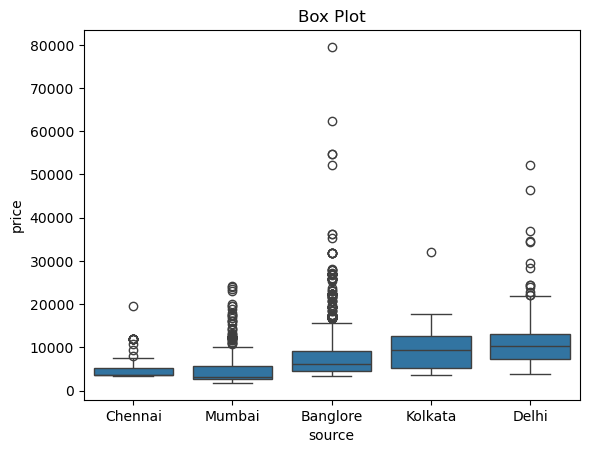

In [35]:
order= train.groupby("source").price.mean().sort_values().index
sns.boxplot(x=train.source, y=train.price, order=order)
plt.title("Box Plot")
plt.show()

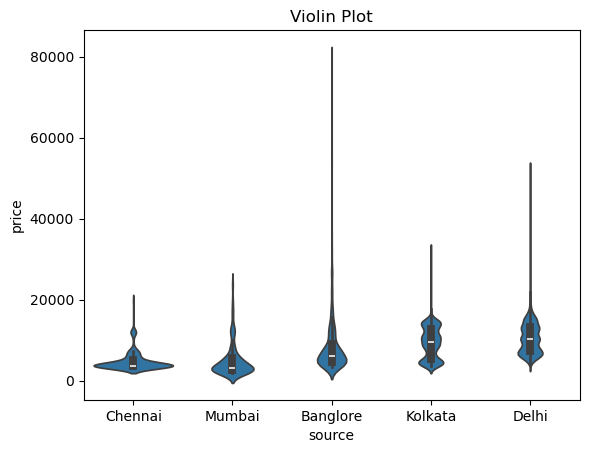

In [36]:
order= train.groupby("source").price.mean().sort_values().index
sns.violinplot(x=train.source, y=train.price, order=order)
plt.title("Violin Plot")
plt.show()

### 7.4 destination

In [37]:
train.destination

0          Cochin
1        Banglore
2          Cochin
3       Hyderabad
4       Hyderabad
          ...    
6689     Banglore
6690       Cochin
6691       Cochin
6692       Cochin
6693       Cochin
Name: destination, Length: 6694, dtype: object

In [38]:
print("Unique Values :'n",train.destination.unique())
print("\nCardinality :",train.destination.nunique())
print("\nMissing Values :",train.destination.isna().sum(),"i.e",train.destination.isna().mean()*100,"%")
print("\nSummary :\n",train.destination.describe())
print("\nCategories Distribution :\n",train.destination.value_counts())

Unique Values :'n ['Cochin' 'Banglore' 'Hyderabad' 'Delhi' 'Kolkata']

Cardinality : 5

Missing Values : 0 i.e 0.0 %

Summary :
 count       6694
unique         5
top       Cochin
freq        2781
Name: destination, dtype: object

Categories Distribution :
 destination
Cochin       2781
Banglore     1878
Delhi        1355
Hyderabad     446
Kolkata       234
Name: count, dtype: int64


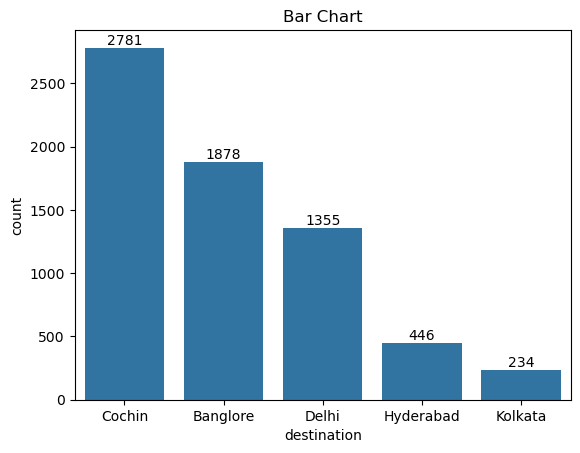

In [39]:
order=train.destination.value_counts().index
ax=sns.countplot(x=train.destination,order=order)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Bar Chart")
plt.show()

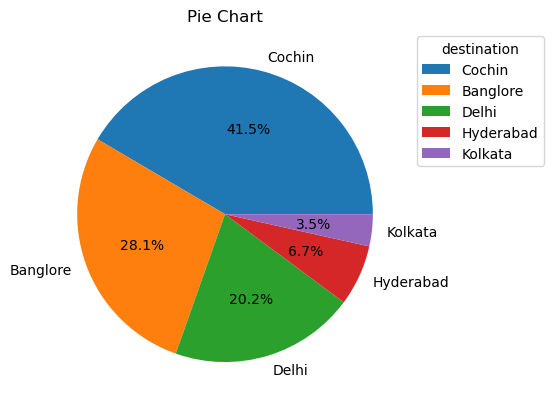

In [40]:
plt.pie(train.destination.value_counts(),labels=train.destination.value_counts().index,autopct="%1.1f%%")
plt.legend(bbox_to_anchor=(1,1),title="destination")
plt.title("Pie Chart")
plt.show()

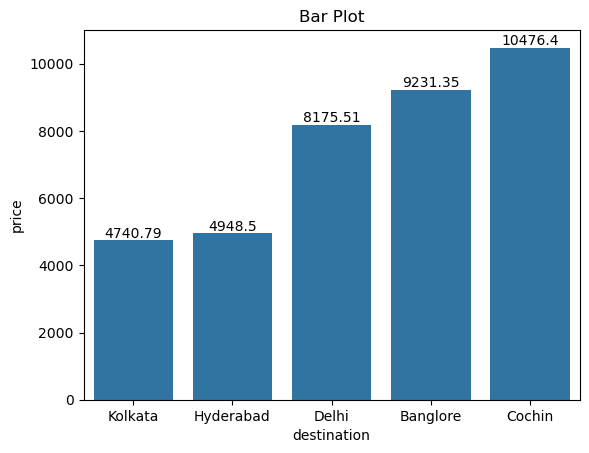

In [41]:
order=train.groupby("destination").price.mean().sort_values().index
ax=sns.barplot(x=train.destination,y=train.price,order=order,errorbar=None)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Bar Plot")
plt.show()

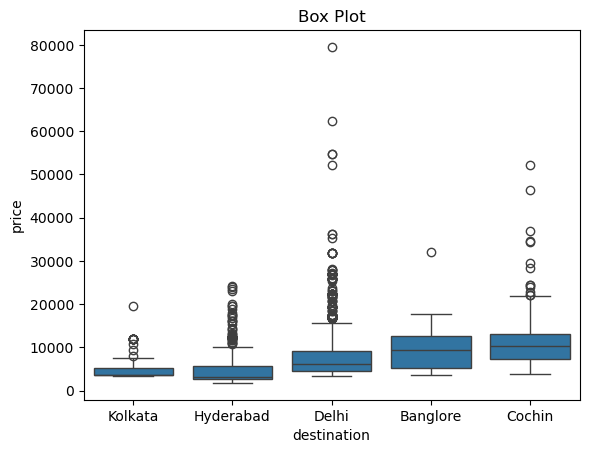

In [42]:
order=train.groupby("destination").price.mean().sort_values().index
sns.boxplot(x=train.destination,y=train.price,order=order)
plt.title("Box Plot")
plt.show()

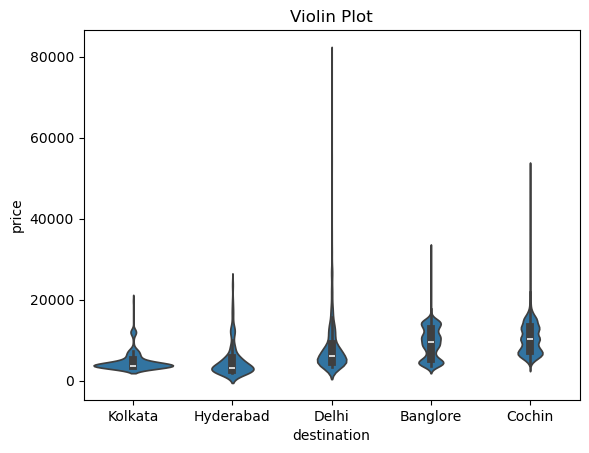

In [43]:
order=train.groupby("destination").price.mean().sort_values().index
sns.violinplot(x=train.destination, y=train.price, order=order)
plt.title("Violin Plot")
plt.show()

### 7.5 dep_time

In [44]:
train.dep_time

0      2025-07-20 20:55:00
1      2025-07-20 18:55:00
2      2025-07-20 09:45:00
3      2025-07-20 21:20:00
4      2025-07-20 02:55:00
               ...        
6689   2025-07-20 11:35:00
6690   2025-07-20 10:00:00
6691   2025-07-20 12:00:00
6692   2025-07-20 07:55:00
6693   2025-07-20 08:00:00
Name: dep_time, Length: 6694, dtype: datetime64[ns]

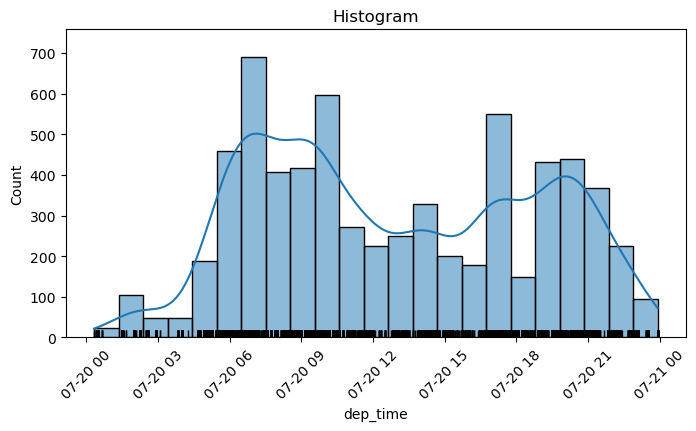

In [45]:
plt.figure(figsize=(8,4))
sns.histplot(data=train, x=train.dep_time, kde=True)
sns.rugplot(data=train, x=train.dep_time, color="black")
plt.xticks(rotation=45)
plt.title("Histogram")
plt.show()

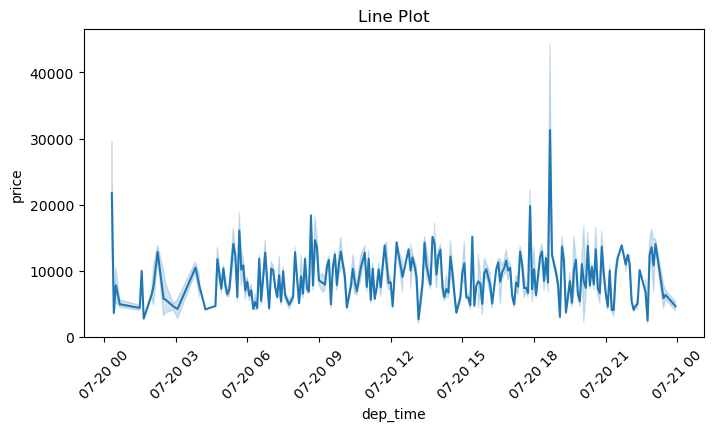

In [46]:
plt.figure(figsize=(8,4))
sns.lineplot(data=train, x=train.dep_time, y=train.price)
plt.xticks(rotation=45)
plt.title("Line Plot")
plt.show()

In [47]:
dep_t=(
        train
        .dep_time
        .dt.hour
        .pipe(lambda ser: pd.Series(np.select([ser.between(4, 12, inclusive="left"),
                                               ser.between(12, 16, inclusive="left"),
                                               ser.between(16, 20, inclusive="left")],
                                              ["morning",
                                               "afternoon",
                                               "evening"],
                                              default="night")))
    )

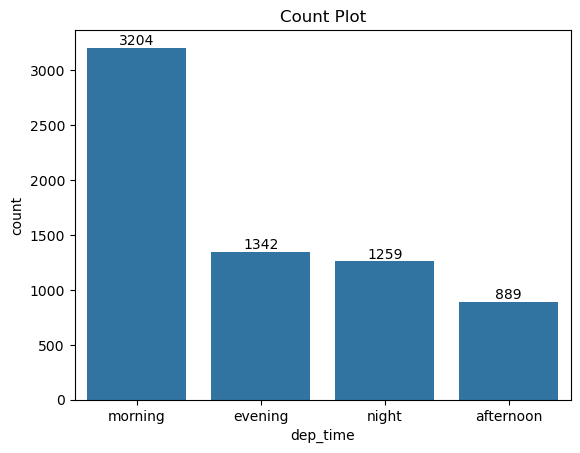

In [48]:
order=dep_t.value_counts().index
ax=sns.countplot(x=dep_t, data=train,order=order)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Count Plot")
plt.xlabel("dep_time")
plt.show()

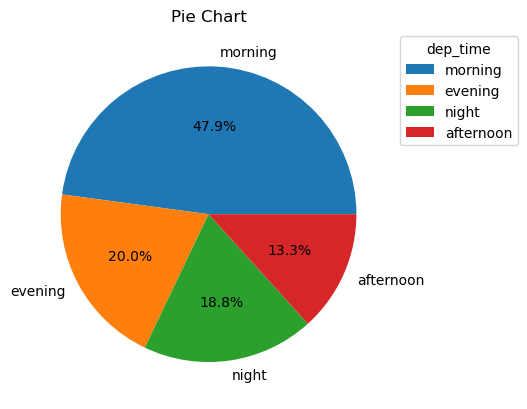

In [49]:
plt.pie(dep_t.value_counts(), labels=dep_t.value_counts().index, autopct="%1.1f%%")
plt.legend(bbox_to_anchor=(1,1),title="dep_time")
plt.title("Pie Chart")
plt.show()

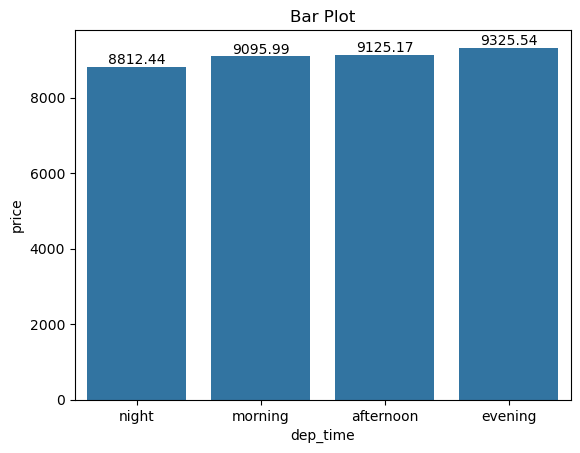

In [50]:
order=train.groupby(dep_t).price.mean().sort_values().index
ax=sns.barplot(x=dep_t, y=train.price, order=order, errorbar=None)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Bar Plot")
plt.xlabel("dep_time")
plt.show()

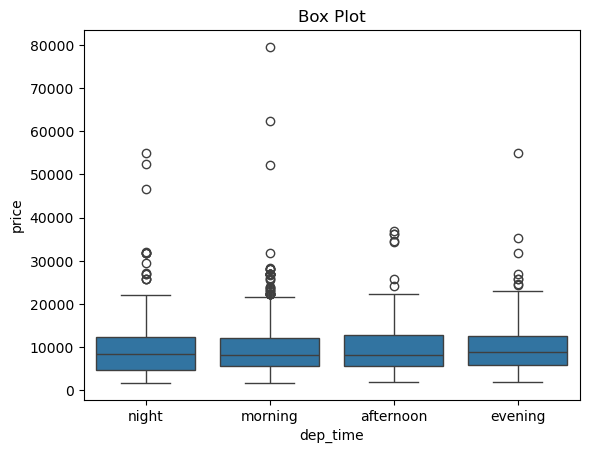

In [51]:
order=train.groupby(dep_t).price.mean().sort_values().index
sns.boxplot(x=dep_t, y=train.price, order=order)
plt.title("Box Plot")
plt.xlabel("dep_time")
plt.show()

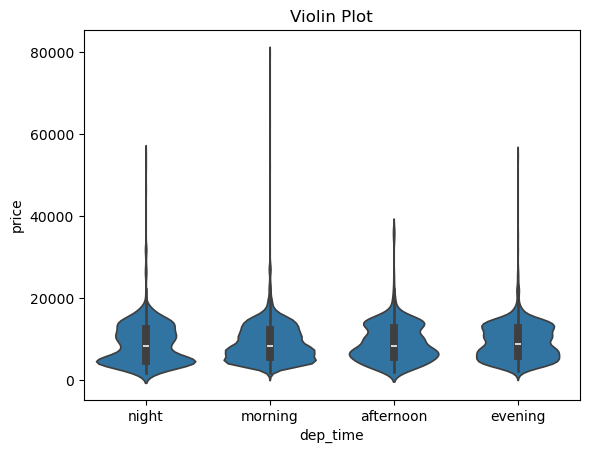

In [52]:
order= train.groupby(dep_t).price.mean().sort_values().index
sns.violinplot(x=dep_t, y= train.price, order=order)
plt.title("Violin Plot")
plt.xlabel("dep_time")
plt.show()

In [53]:
dex=train.assign(dep_t=dep_t)
dex

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,dep_t
0,Jet Airways,2019-05-27,Delhi,Cochin,2025-07-20 20:55:00,2025-07-20 12:35:00,940,1.0,In-flight meal not included,12898,night
1,Jet Airways,2019-06-12,Kolkata,Banglore,2025-07-20 18:55:00,2025-07-20 16:20:00,1285,1.0,No Info,13044,evening
2,Air India,2019-05-18,Delhi,Cochin,2025-07-20 09:45:00,2025-07-20 09:25:00,1420,2.0,No Info,10975,morning
3,Indigo,2019-06-03,Mumbai,Hyderabad,2025-07-20 21:20:00,2025-07-20 22:50:00,90,0.0,No Info,2227,night
4,Jet Airways,2019-04-01,Mumbai,Hyderabad,2025-07-20 02:55:00,2025-07-20 04:20:00,85,0.0,No Info,5678,night
...,...,...,...,...,...,...,...,...,...,...,...
6689,Spicejet,2019-06-09,Kolkata,Banglore,2025-07-20 11:35:00,2025-07-20 18:50:00,435,1.0,No Info,8479,morning
6690,Multiple Carriers,2019-05-09,Delhi,Cochin,2025-07-20 10:00:00,2025-07-20 01:30:00,930,1.0,No Info,15078,morning
6691,Air India,2019-05-18,Delhi,Cochin,2025-07-20 12:00:00,2025-07-20 07:40:00,1180,2.0,No Info,8603,afternoon
6692,Air Asia,2019-05-18,Delhi,Cochin,2025-07-20 07:55:00,2025-07-20 13:25:00,330,1.0,No Info,8759,morning


C:\Users\rahul\anaconda3\envs\aws\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


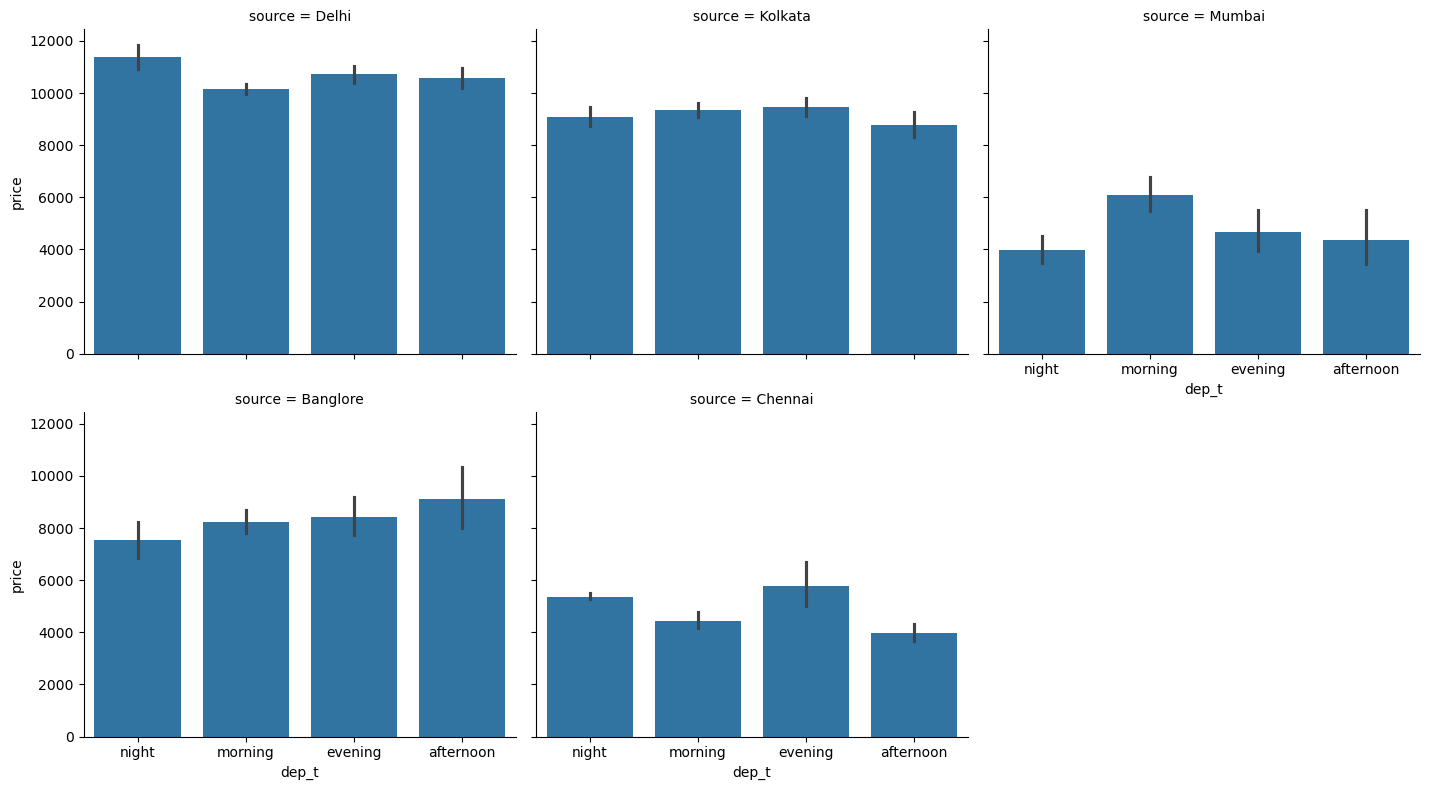

In [54]:
dep_grid= sns.FacetGrid(
    data=dex,
    col="source",
    col_wrap=3,
    height=4,
    aspect=1.2,
    sharey=True
)
dep_grid.map(sns.barplot,"dep_t","price")

### 7.6 arrival_time

In [55]:
train.arrival_time

0      2025-07-20 12:35:00
1      2025-07-20 16:20:00
2      2025-07-20 09:25:00
3      2025-07-20 22:50:00
4      2025-07-20 04:20:00
               ...        
6689   2025-07-20 18:50:00
6690   2025-07-20 01:30:00
6691   2025-07-20 07:40:00
6692   2025-07-20 13:25:00
6693   2025-07-20 19:00:00
Name: arrival_time, Length: 6694, dtype: datetime64[ns]

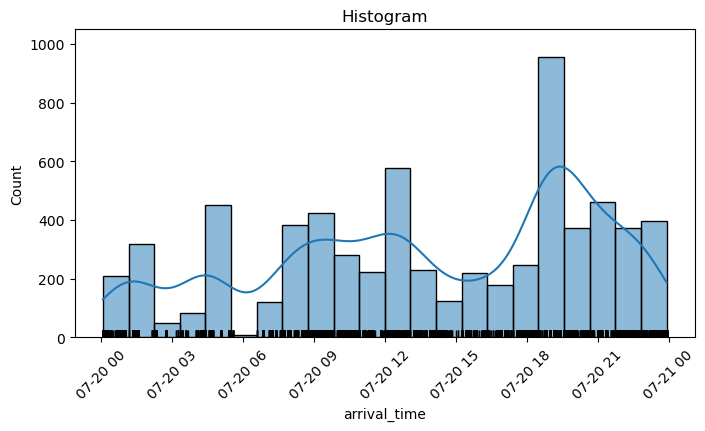

In [56]:
plt.figure(figsize=(8,4))
sns.histplot(x=train.arrival_time,kde=True)
sns.rugplot(x=train.arrival_time,color="black")
plt.xticks(rotation=45)
plt.title("Histogram")
plt.show()

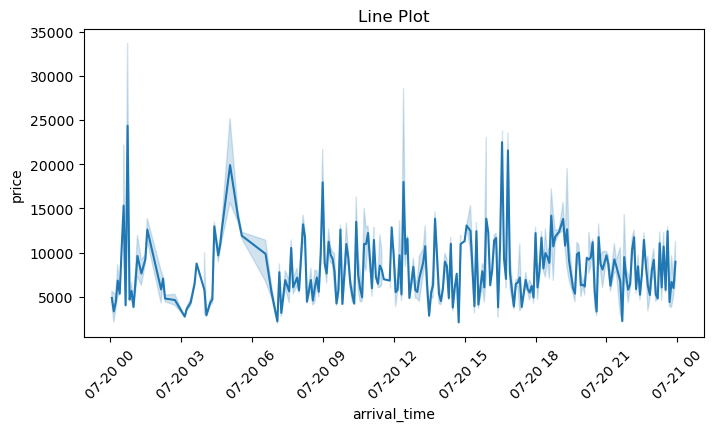

In [57]:
plt.figure(figsize=(8,4))
sns.lineplot(x=train.arrival_time,y=train.price)
plt.xticks(rotation=45)
plt.title("Line Plot")
plt.show()

In [58]:
arrival_t=(
    train
    .arrival_time
    .dt.hour
    .pipe(lambda ser: pd.Series(np.select([ser.between(4,12,inclusive="left"),
                                           ser.between(12,16,inclusive="left"),
                                           ser.between(16,20,inclusive="left")],
                                          ["morning",
                                           "afternoon",
                                           "evening"],
                                          default="night")))
)

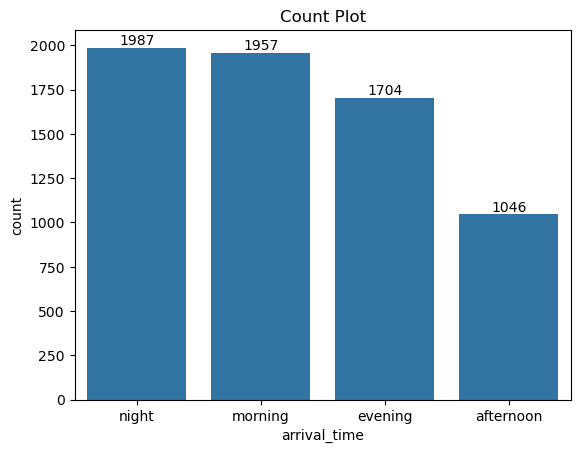

In [59]:
order=arrival_t.value_counts().index
ax=sns.countplot(x=arrival_t,data=train,order=order)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel("arrival_time")
plt.title("Count Plot")
plt.show()

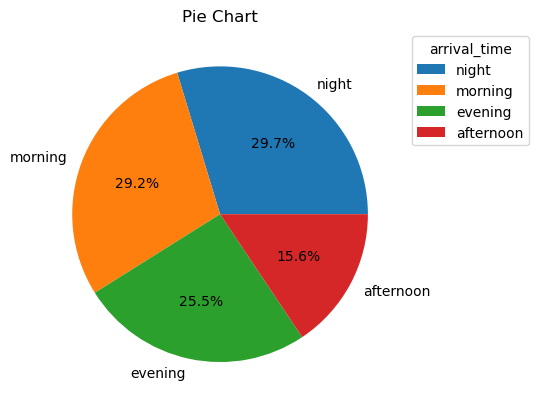

In [60]:
plt.pie(arrival_t.value_counts(),labels=arrival_t.value_counts().index,autopct="%1.1f%%")
plt.legend(bbox_to_anchor=(1,1),title="arrival_time")
plt.title("Pie Chart")
plt.show()

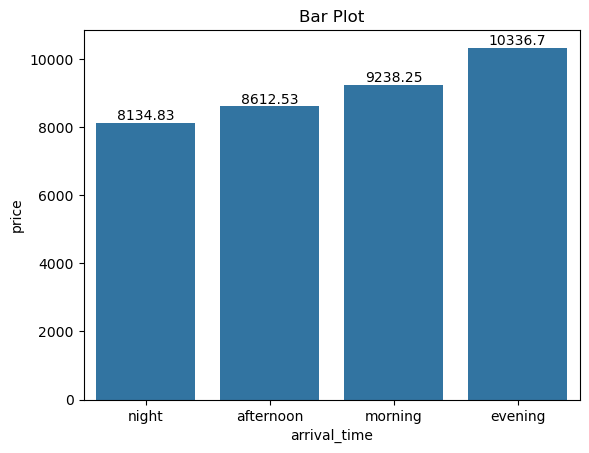

In [61]:
order=train.groupby(arrival_t).price.mean().sort_values().index
ax=sns.barplot(x=arrival_t, y=train.price, order=order,errorbar=None)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Bar Plot")
plt.xlabel("arrival_time")
plt.show()

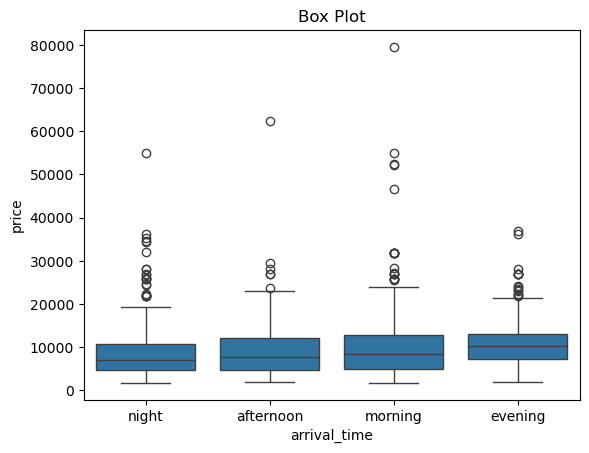

In [62]:
order=train.groupby(arrival_t).price.mean().sort_values().index
sns.boxplot(x=arrival_t, y=train.price, order=order)
plt.xlabel("arrival_time")
plt.title("Box Plot")
plt.show()

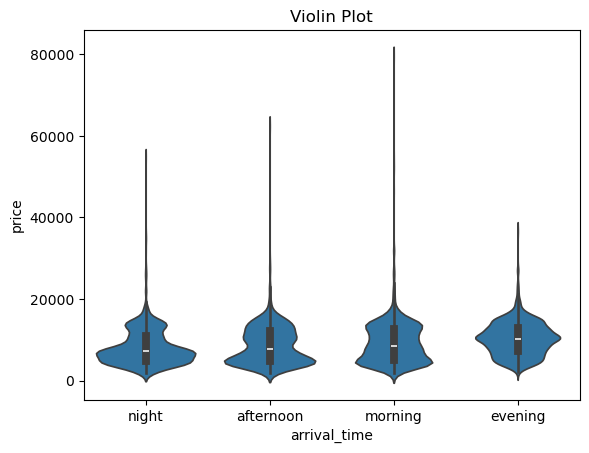

In [63]:
order=train.groupby(arrival_t).price.mean().sort_values().index
sns.violinplot(x=arrival_t, y=train.price, order=order)
plt.xlabel("arrival_time")
plt.title("Violin Plot")
plt.show()

In [64]:
aex=train.assign(arrival_t=arrival_t)

C:\Users\rahul\anaconda3\envs\aws\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


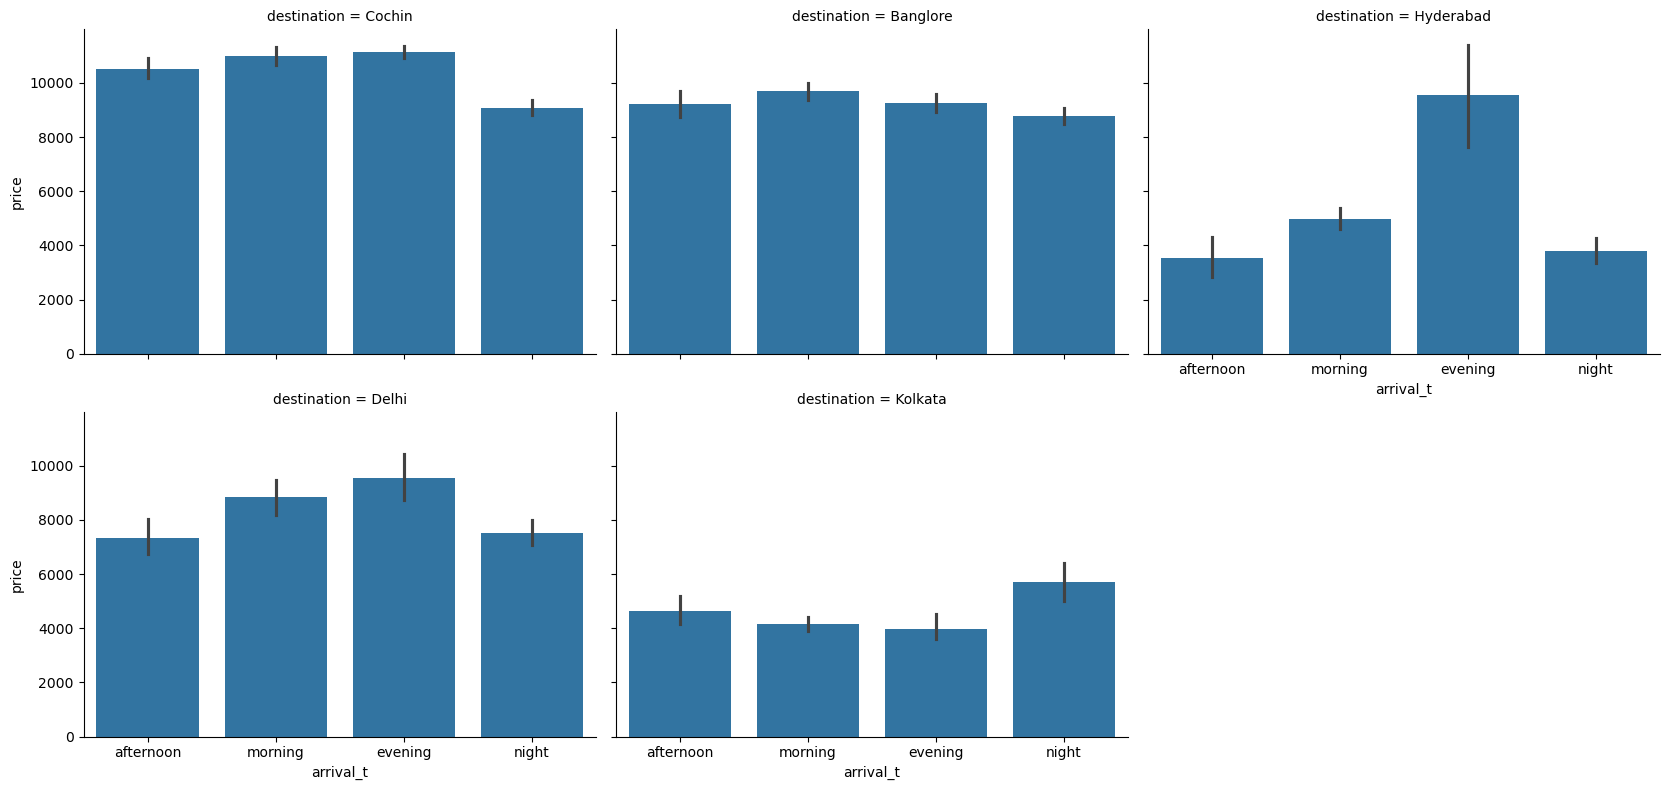

In [65]:
arrival_grid= sns.FacetGrid(
    data=aex,
    col="destination",
    col_wrap=3,
    height=4,
    aspect=1.4,
    sharey=True
)
arrival_grid.map(sns.barplot,"arrival_t","price")

### 7.7 duration

In [66]:
train.duration

0        940
1       1285
2       1420
3         90
4         85
        ... 
6689     435
6690     930
6691    1180
6692     330
6693     660
Name: duration, Length: 6694, dtype: int64

In [67]:
train.duration.isna().sum()

np.int64(0)

In [68]:
train.duration.describe()

count    6694.000000
mean      637.633702
std       504.395941
min        75.000000
25%       170.000000
50%       515.000000
75%       925.000000
max      2860.000000
Name: duration, dtype: float64

In [69]:
from scipy.stats import trim_mean

In [70]:
print("Trimmed Mean (5%) :",trim_mean(train.duration,proportiontocut=0.05))
print("Trimmed Mean (10%) :",trim_mean(train.duration,proportiontocut=0.1))
print("Median :",train.duration.median())
print("IQR :",train.duration.quantile(0.75)-train.duration.quantile(0.25))
print("Skewness :",train.duration.skew())
print("Kurtosis :",train.duration.kurt())

Trimmed Mean (5%) : 603.7446067042814
Trimmed Mean (10%) : 575.5003734129948
Median : 515.0
IQR : 755.0
Skewness : 0.9029187840602729
Kurtosis : -0.006774061836956058


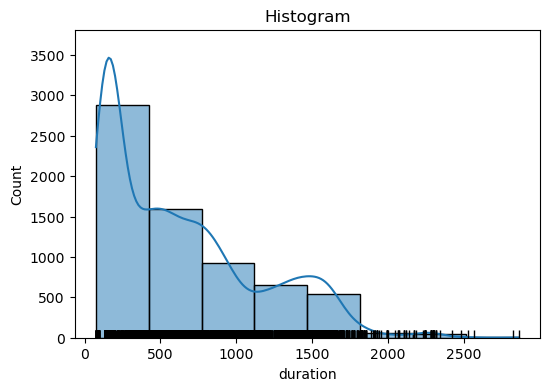

In [89]:
plt.figure(figsize=(6,4))
sns.histplot(x=train.duration, kde=True, bins=8)
sns.rugplot(x=train.duration, color="black")
plt.title("Histogram")
plt.show()

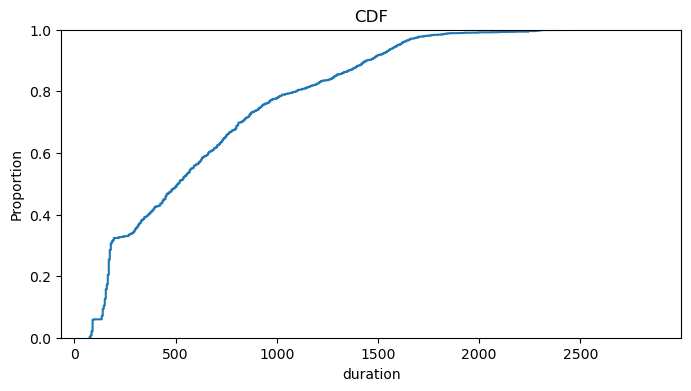

In [72]:
plt.figure(figsize=(8,4))
sns.ecdfplot(x=train.duration)
plt.title("CDF")
plt.show()

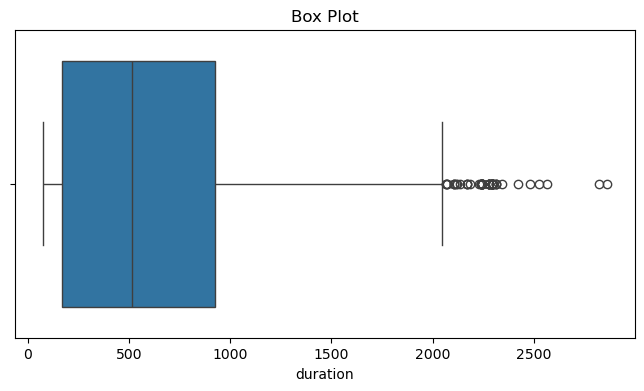

In [73]:
plt.figure(figsize=(8,4))
sns.boxplot(x=train.duration)
plt.title("Box Plot")
plt.show()

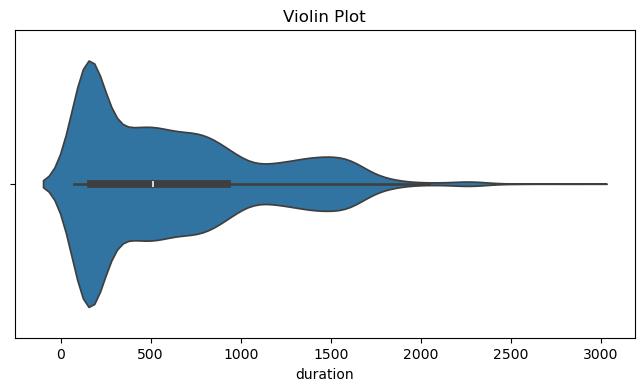

In [74]:
plt.figure(figsize=(8,4))
sns.violinplot(x=train.duration)
plt.title("Violin Plot")
plt.show()

In [75]:
from scipy import stats

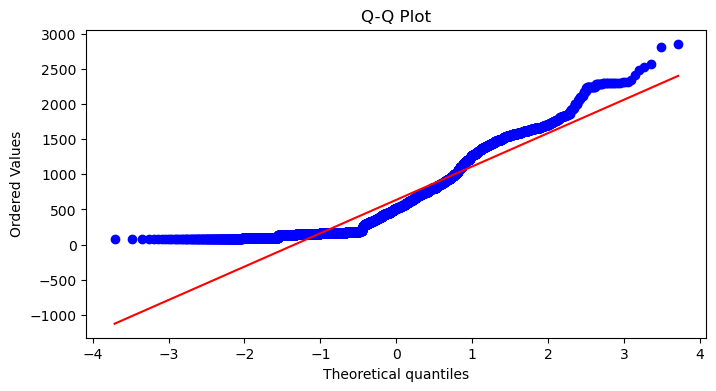

In [76]:
plt.figure(figsize=(8,4))
stats.probplot(train.duration, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

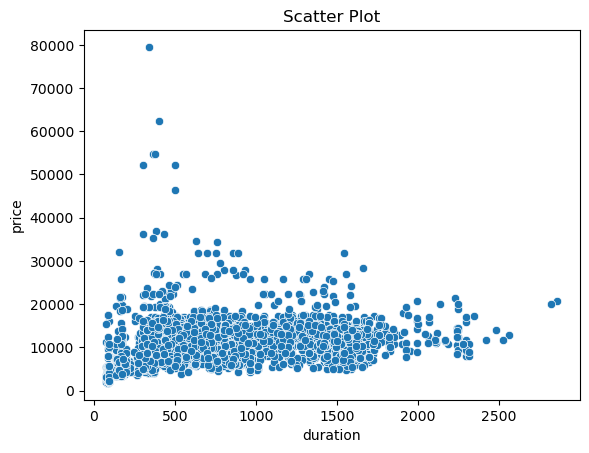

In [77]:
sns.scatterplot(x=train.duration, y=train.price)
plt.title("Scatter Plot")
plt.show()

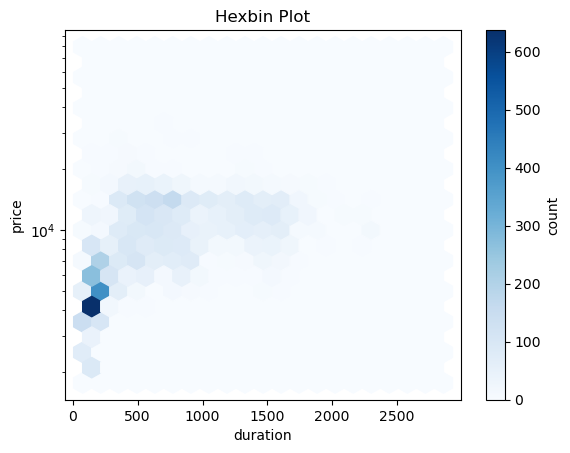

In [88]:
plt.hexbin(x=train.duration, y=train.price, cmap="Blues",gridsize=20, yscale="log")
plt.colorbar(label="count")
plt.title("Hexbin Plot")
plt.xlabel("duration")
plt.ylabel("price")
plt.show()

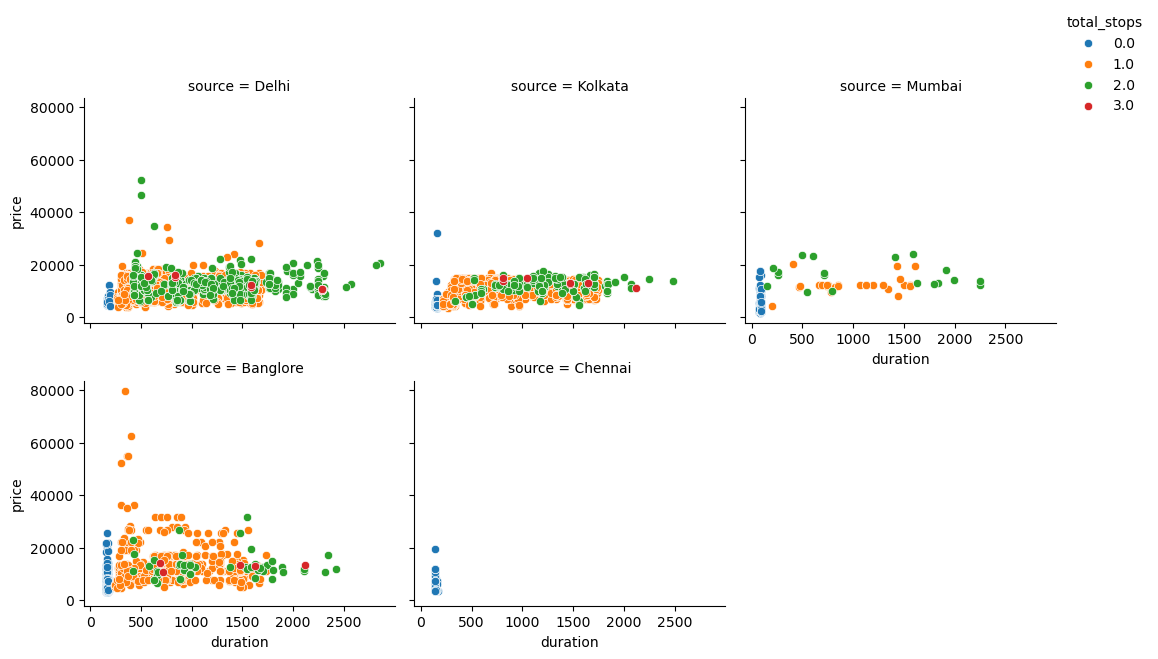

In [91]:
duration_grid= sns.FacetGrid(
    data=train,
    col="source",
    hue="total_stops",
    height=3,
    aspect=1.2,
    col_wrap=3,
    sharey=True
)
duration_grid.map(sns.scatterplot,"duration","price")
duration_grid.add_legend(bbox_to_anchor=(1,1))
plt.show()

In [80]:
q1=(
    train
    .duration
    .quantile(0.25)
)
q3=(
    train
    .duration
    .quantile(0.75)
)

In [81]:
iqr= q3-q1

lower_limit = q1 - (1.5*iqr)
upper_limit = q3 + (1.5*iqr)

print("lower_limit :",lower_limit)
print("upper_limit :",upper_limit)

lower_limit : -962.5
upper_limit : 2057.5


In [82]:
outliers= train[(train["duration"]<lower_limit)|(train["duration"]>upper_limit)]
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56 entries, 271 to 6527
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          56 non-null     object        
 1   date_of_journey  56 non-null     datetime64[ns]
 2   source           56 non-null     object        
 3   destination      56 non-null     object        
 4   dep_time         56 non-null     datetime64[ns]
 5   arrival_time     56 non-null     datetime64[ns]
 6   duration         56 non-null     int64         
 7   total_stops      56 non-null     float64       
 8   additional_info  56 non-null     object        
 9   price            56 non-null     int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 4.8+ KB


In [93]:
outliers

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
271,Air India,2019-05-15,Kolkata,Banglore,2025-07-20 05:50:00,2025-07-20 16:15:00,2065,2.0,No Info,12723
319,Jet Airways,2019-03-06,Delhi,Cochin,2025-07-20 05:30:00,2025-07-20 19:45:00,2295,2.0,In-flight meal not included,15864
331,Air India,2019-05-15,Delhi,Cochin,2025-07-20 05:00:00,2025-07-20 19:15:00,2295,2.0,No Info,10493
345,Air India,2019-03-27,Delhi,Cochin,2025-07-20 05:00:00,2025-07-20 19:15:00,2295,2.0,No Info,8026
421,Jet Airways,2019-03-06,Delhi,Cochin,2025-07-20 19:10:00,2025-07-20 18:50:00,2860,2.0,No Info,20694
425,Air India,2019-03-03,Delhi,Cochin,2025-07-20 07:05:00,2025-07-20 19:15:00,2170,2.0,No Info,11762
447,Jet Airways,2019-03-03,Delhi,Cochin,2025-07-20 05:40:00,2025-07-20 18:50:00,2230,2.0,No Info,21314
730,Air India,2019-05-12,Kolkata,Banglore,2025-07-20 12:00:00,2025-07-20 23:15:00,2115,3.0,No Info,10991
984,Air India,2019-06-06,Delhi,Cochin,2025-07-20 05:00:00,2025-07-20 19:15:00,2295,2.0,No Info,9653
1078,Jet Airways,2019-03-27,Delhi,Cochin,2025-07-20 05:25:00,2025-07-20 19:45:00,2300,2.0,No Info,11664


### 7.8 additional_info

In [3]:
train.additional_info

0       In-flight meal not included
1                           No Info
2                           No Info
3                           No Info
4                           No Info
                   ...             
6689                        No Info
6690                        No Info
6691                        No Info
6692                        No Info
6693                        No Info
Name: additional_info, Length: 6694, dtype: object

In [4]:
print("Missing Values :",train.additional_info.isna().sum()," i.e ",train.additional_info.isna().mean()*100,"%")
print("\nUnique Values :\n",train.additional_info.unique())
print("\nCardinality :",train.additional_info.nunique())
print("\nSummary :\n",train.additional_info.describe())
print("\nCategories Distribution :\n",train.additional_info.value_counts())

Missing Values : 0  i.e  0.0 %

Unique Values :
 ['In-flight meal not included' 'No Info' 'No check-in baggage included'
 'Change airports' '1 Long layover' 'Business class' '1 Short layover'
 'Red-eye flight']

Cardinality : 8

Summary :
 count        6694
unique          8
top       No Info
freq         5226
Name: additional_info, dtype: object

Categories Distribution :
 additional_info
No Info                         5226
In-flight meal not included     1230
No check-in baggage included     214
1 Long layover                    14
Change airports                    5
Business class                     3
1 Short layover                    1
Red-eye flight                     1
Name: count, dtype: int64


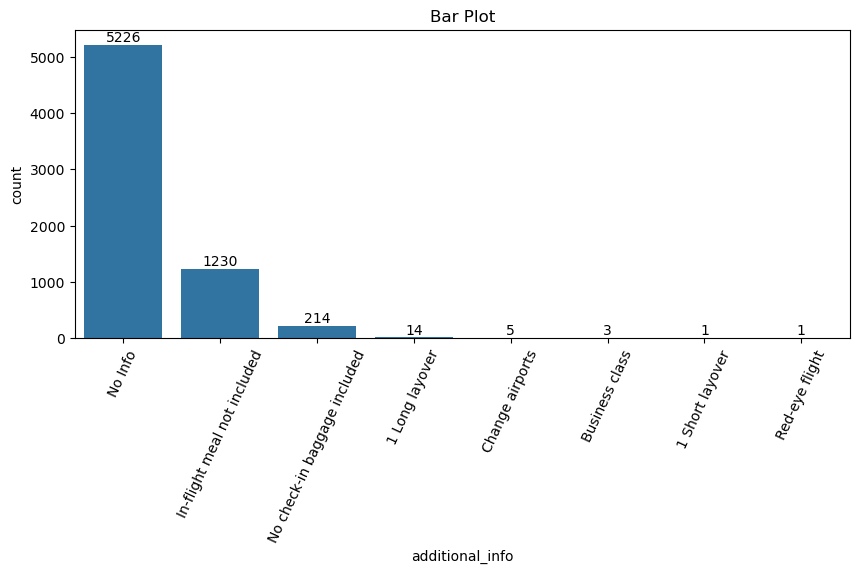

In [5]:
plt.figure(figsize=(10,4))
order=train.additional_info.value_counts().index
ax=sns.countplot(x=train.additional_info,order=order)
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=65)
plt.title("Bar Plot")
plt.show()

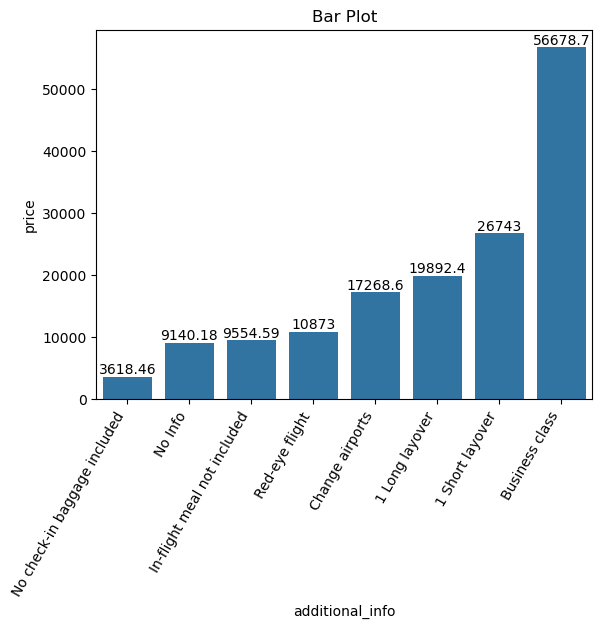

In [30]:
order=train.groupby("additional_info").price.mean().sort_values().index
ax=sns.barplot(x=train.additional_info,y=train.price,order=order, errorbar=None)
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=60,ha="right")
plt.title("Bar Plot")
plt.show()

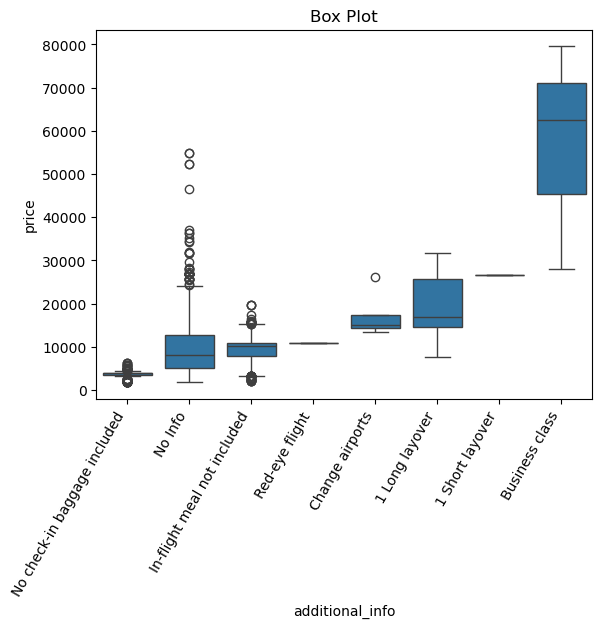

In [31]:
order= train.groupby("additional_info").price.mean().sort_values().index
sns.boxplot(x=train.additional_info, y=train.price,order=order)
plt.xticks(rotation=60,ha="right")
plt.title("Box Plot")
plt.show()

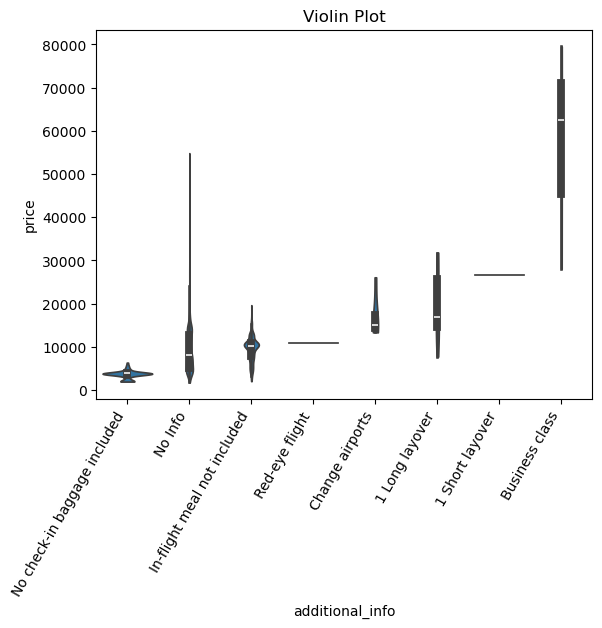

In [46]:
order= train.groupby("additional_info").price.mean().sort_values().index
sns.violinplot(x=train.additional_info, y=train.price,order=order, cut=0)
plt.xticks(rotation=60,ha="right")
plt.title("Violin Plot")
plt.show()